In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objs as go
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix
import seaborn as sns
#기존에 정제했던 airkorea의 데이터는 불균형이 없어 다른 데이터를 이용하였습니다.
#현재 업무와 관련된 고객 이탈을 찾는 모델링을 하려했으나, 어떤 오픈 api에서도 이탈 데이터를 찾을 수가 없어서 UCI에서 실제와 유사하게 만든 dataset을 사용했습니다.
url = 'https://query.data.world/s/5sja3fgjwgfpta4fs6avcvv7d4ybhb'
data = pd.read_csv(url)#5000개

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier      
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [3]:
data.head()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,No,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,No,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,No,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,No,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,No,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   churn                       5000 non-null   object 
 1   accountlength               5000 non-null   int64  
 2   internationalplan           5000 non-null   object 
 3   voicemailplan               5000 non-null   object 
 4   numbervmailmessages         5000 non-null   int64  
 5   totaldayminutes             5000 non-null   float64
 6   totaldaycalls               5000 non-null   int64  
 7   totaldaycharge              5000 non-null   float64
 8   totaleveminutes             5000 non-null   float64
 9   totalevecalls               5000 non-null   int64  
 10  totalevecharge              5000 non-null   float64
 11  totalnightminutes           5000 non-null   float64
 12  totalnightcalls             5000 non-null   int64  
 13  totalnightcharge            5000 

In [5]:
data['churn'] = data.churn.replace({'Yes': 1, 'No': 0}) #object인 yes, no를 1,0으로 변환
data['internationalplan'] = data.internationalplan.replace({'yes': 1, 'no': 0})
data['voicemailplan'] = data.voicemailplan.replace({'yes': 1, 'no': 0})

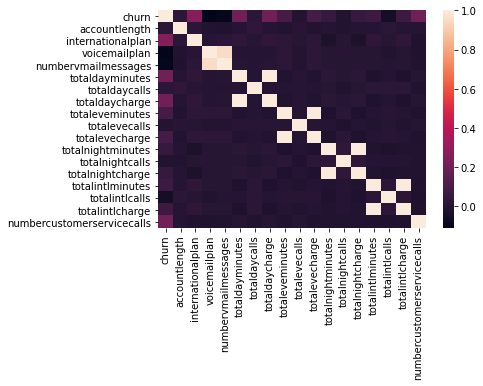

In [6]:
corr = data.corr() #상관관계 확인
sns.heatmap(corr)

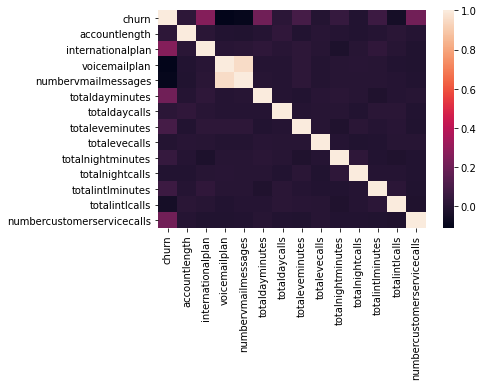

In [7]:
data2 = data.drop('totaldaycharge',1) #상관관계 있는 컬럼 제거
data2 = data2.drop('totalevecharge',1)
data2 = data2.drop('totalnightcharge',1)
data2 = data2.drop('totalintlcharge',1)
corr = data2.corr()
sns.heatmap(corr)


In [8]:
X = data2.drop('churn', 1) #데이터셋을 input과 target으로 나눠준다.
y = data2['churn']
X

,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaleveminutes,totalevecalls,totalnightminutes,totalnightcalls,totalintlminutes,totalintlcalls,numbercustomerservicecalls
0,128,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,107,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,137,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,84,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,75,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,0,1,40,235.7,127,223.0,126,297.5,116,9.9,5,2
4996,152,0,0,0,184.2,90,256.8,73,213.6,113,14.7,2,3
4997,61,0,0,0,140.6,89,172.8,128,212.4,97,13.6,4,1
4998,109,0,0,0,188.8,67,171.7,92,224.4,89,8.5,6,0


In [9]:
imblance_ratio = y.value_counts(normalize=True)
print(imblance_ratio) #이탈한 유저가 약 14%로 데이터 불균형이 있다.

0    0.8586
1    0.1414
Name: churn, dtype: float64


In [10]:
#사용한 모델들
models = [['KNN', KNeighborsClassifier()],
          ['Naive Bayes', GaussianNB()],
          ['SVM', SVC()],
          ['DecisionTree',DecisionTreeClassifier()],
          ['RandomForest',RandomForestClassifier()]          ]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 710) #불균형데이터 그대로 사용했을 때의 결과
for model in models:
    classifier = model[1]
    classifier.fit(X_train, y_train.values.ravel())
    classifierName = model[0]
    
    
    prediction = classifier.predict(X_test)
    z = confusion_matrix(prediction,y_test)
    fig = ff.create_annotated_heatmap(z, x=['Not Churn','Churn'], y=['Predicted Not Churn','Predicted Churn'], showscale =True)
    fig.show()
    
    roc_auc = roc_auc_score(y_test, prediction)
    f1 = f1_score(y_test, prediction )

    
    
    print(classifierName, '- ROC-AUC score: ',roc_auc)
    print(classifierName, '- F1 score: ' ,f1)
    print('')

KNN - ROC-AUC score:  0.6630809731299928
KNN - F1 score:  0.4729729729729731



Naive Bayes - ROC-AUC score:  0.6546160130718954
Naive Bayes - F1 score:  0.4294117647058824



/usr/local/lib/python3.7/dist-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVM - ROC-AUC score:  0.5
SVM - F1 score:  0.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.



DecisionTree - ROC-AUC score:  0.8571623093681917
DecisionTree - F1 score:  0.7181818181818181



RandomForest - ROC-AUC score:  0.8054874727668846
RandomForest - F1 score:  0.7341040462427747



In [13]:
#!pip install --upgrade scikit-learn                 #over-sampling 모듈 import 
!pip install --upgrade scikit-learn==0.20.3     #scikit-learn 패키지 버전 0.23이후로 여러 모듈이 삭제되어 0.20버전으로 다운그레이드.
#!pip3 install --user imbalanced-learn==0.5
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
new_X, new_y = adasyn.fit_resample(X,y)
adasyn_X = pd.DataFrame(data=new_X,columns=X.columns )
adasyn_y= pd.DataFrame(data=new_y,columns=["churn"])
print(adasyn_y.value_counts(normalize=True) * 100) # oversampling 후 비율
X_train, X_test, y_train, y_test = train_test_split(adasyn_X, adasyn_y, test_size = 0.30, random_state = 189) #train, test로 split

Requirement already up-to-date: scikit-learn==0.20.3 in /usr/local/lib/python3.7/dist-packages (0.20.3)
churn
1        50.970763
0        49.029237
dtype: float64


In [14]:

for model in models:
    classifier = model[1]
    classifier.fit(X_train, y_train.values.ravel())
    classifierName = model[0]
    
    prediction = classifier.predict(X_test)
    z = confusion_matrix(prediction,y_test)
    fig = ff.create_annotated_heatmap(z, x=['Not Churn','Churn'], y=['Predicted Not Churn','Predicted Churn'], showscale =True)
    fig.show()
    
    roc_auc = roc_auc_score(y_test, prediction)
    f1 = f1_score(y_test, prediction )
    
    print(classifierName, 'ROC-AUC score: ',roc_auc)
    print(classifierName, 'F1 score: ' ,f1)
    print('')

KNN ROC-AUC score:  0.8168325727853679
KNN F1 score:  0.8474358974358975



Naive Bayes ROC-AUC score:  0.7834817909049594
Naive Bayes F1 score:  0.7837324211326492



/usr/local/lib/python3.7/dist-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVM ROC-AUC score:  0.6844879518072289
SVM F1 score:  0.5390539053905391



DecisionTree ROC-AUC score:  0.9318405260765928
DecisionTree F1 score:  0.932681459195186



RandomForest ROC-AUC score:  0.9503835202240833
RandomForest F1 score:  0.9495183044315992



In [15]:
classifierName

'RandomForest'

In [17]:
importance = classifier.feature_importances_
df_imp = pd.DataFrame(zip(X_train.columns.values, importance))
df_imp.columns = ['feature', 'importance']
df_imp.sort_values("importance", ascending=False, inplace=True)
df_imp

,feature,importance
1,internationalplan,0.210805
12,numbercustomerservicecalls,0.185725
4,totaldayminutes,0.151167
6,totaleveminutes,0.071348
2,voicemailplan,0.059732
11,totalintlcalls,0.055801
10,totalintlminutes,0.049916
8,totalnightminutes,0.043060
3,numbervmailmessages,0.037011
0,accountlength,0.035146
